In [12]:
import pandas as pd
import os
import numpy as np
import pyarrow.parquet as pq
from matplotlib import pyplot as plt
import seaborn as sns

train = pd.read_csv("C:/Users/zulay/Downloads/Fall 2019/DAEN 690/first_25000.csv")

print(train)

       Unnamed: 0   0  1   2   3   4   5   6   7  8  ...   8702  8703  8704  \
0               0  18  1 -19 -16  -5  19 -15  15 -1  ...     18   -22    12   
1               1  18  0 -19 -17  -6  19 -17  16  0  ...     17   -21    12   
2               2  17 -1 -20 -17  -6  19 -17  15 -3  ...     16   -21    13   
3               3  18  1 -19 -16  -5  20 -16  16  0  ...     16   -21    12   
4               4  18  0 -19 -16  -5  20 -17  16 -2  ...     17   -22    12   
5               5  18  0 -20 -15  -4  20 -16  15 -2  ...     17   -22    12   
6               6  19  1 -18 -16  -5  20 -16  16 -1  ...     18   -22    12   
7               7  18  0 -19 -17  -7  18 -17  15 -2  ...     17   -22    11   
8               8  18  0 -20 -18  -7  18 -16  15 -2  ...     17   -23    11   
9               9  17  0 -19 -17  -7  18 -17  17 -1  ...     16   -22    11   
10             10  18  0 -19 -16  -4  20 -16  14 -2  ...     16   -22    11   
11             11  18  1 -19 -16  -5  20 -15  17 -1 

Text(0,0.5,'Amplitude')

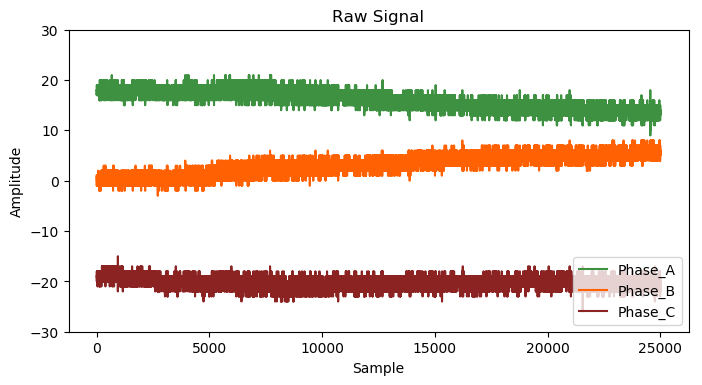

In [13]:
# Step 1: Plotting the raw data to find fault patterns in the signals

fig=plt.figure(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')
plot_labels = ['Phase_A', 'Phase_B', 'Phase_C']
colores = ["#3D9140", "#FF6103", "#8B2323"]
plt.plot(list(range(len(train))), train["0"], '-', label=plot_labels[0], color=colores[0])
plt.plot(list(range(len(train))), train["1"], '-', label=plot_labels[1], color=colores[1])
plt.plot(list(range(len(train))), train["2"], '-', label=plot_labels[2], color=colores[2])
plt.ylim((-30, 30))
plt.legend(loc='lower right')
plt.title('Raw Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

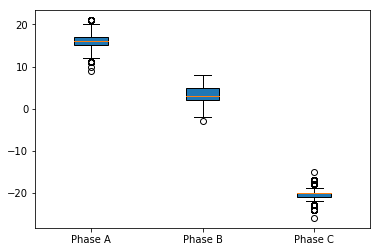

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
 
value1 = train["0"]
value2 = train["1"]
value3 = train["2"]
 
box_plot_data=[value1,value2,value3]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Phase A','Phase B','Phase C'])
plt.show()

Text(0,0.5,'Amplitude')

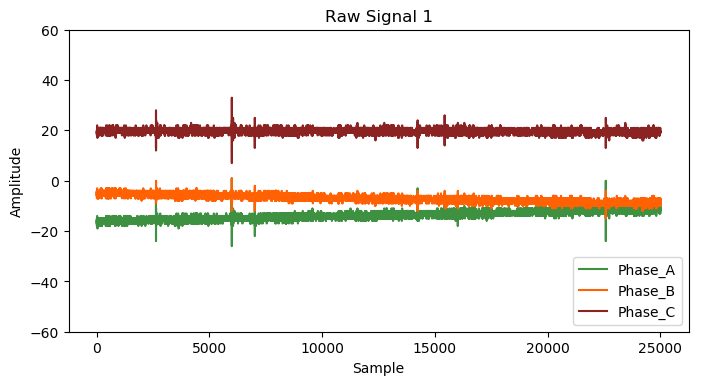

In [15]:
fig=plt.figure(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')
plot_labels = ['Phase_A', 'Phase_B', 'Phase_C']
colores = ["#3D9140", "#FF6103", "#8B2323"]
plt.plot(list(range(len(train))), train["3"], '-', label=plot_labels[0], color=colores[0])
plt.plot(list(range(len(train))), train["4"], '-', label=plot_labels[1], color=colores[1])
plt.plot(list(range(len(train))), train["5"], '-', label=plot_labels[2], color=colores[2])
plt.ylim((-60, 60))
plt.legend(loc='lower right')
plt.title('Raw Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

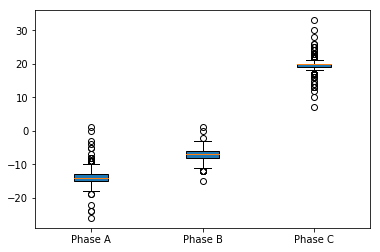

In [16]:
value1 = train["3"]
value2 = train["4"]
value3 = train["5"]
 
box_plot_data=[value1,value2,value3]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Phase A','Phase B','Phase C'])
plt.show()

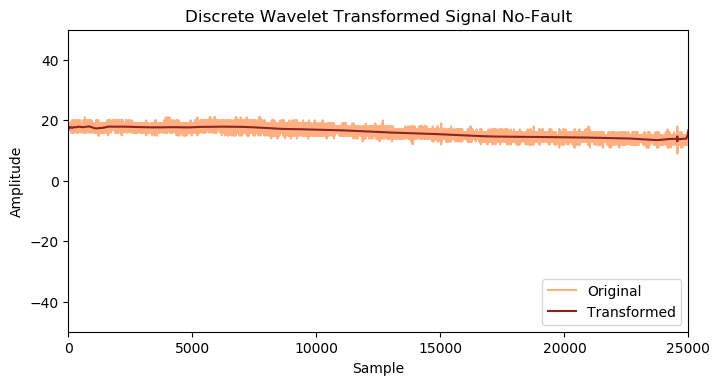

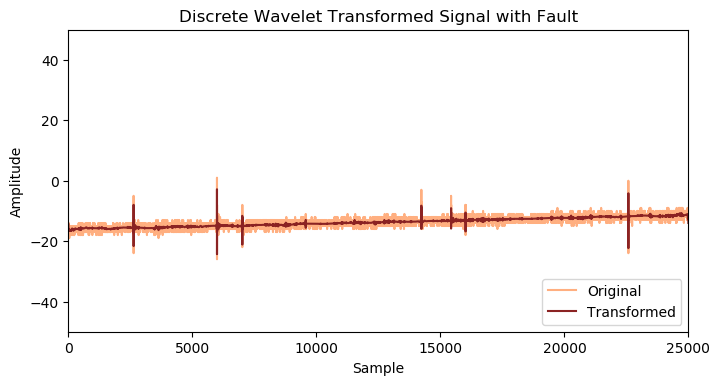

In [17]:
# Step 2: Using Pywavelets to remove noise (High-frequency noise)

# References
# Why using this aproach (Discrete Wavelet Transfrom)? Reading:Links provided in the reference section [8] & [9] Project report
# I used and modified the following code (Kernel-link below) to get the wavelet smoothing parameters and de-noise the dataset. 
# http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/ 
# To find a deep explanation how the Python code works: https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html
# To explore deeply into Wavelet : "A guide for using the Wavelet Transform in Machine Learning"
#http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

import pywt
from statsmodels.robust import mad
from scipy import signal
def waveletSmooth( x, wavelet="db4", level=1, title=None ):
    coeff = pywt.wavedec( x, wavelet, mode="per" )
    sigma = mad( coeff[-level] )
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="soft" ) for i in coeff[1:] )

    y = pywt.waverec( coeff, wavelet, mode="per" )
    f, ax = plt.subplots(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')
    colores = ["#3D9140", "#FF6103", "#8B2323"]
    plt.plot( x, color="#FF6103", alpha=0.5, label="Original")
    plt.plot( y, color="#8B2323", label="Transformed" )
    plt.ylim((-50, 50))
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc='lower right')
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(y)))
    return y
title1 = 'Discrete Wavelet Transformed Signal No-Fault'
title2 = 'Discrete Wavelet Transformed Signal with Fault'
signal_1 =  waveletSmooth(train["0"], wavelet="db4", level=1, title=title1)
signal_2 =  waveletSmooth(train["3"], wavelet="db4", level=1, title=title2 )


In [18]:
# Trying to explore more the noise
print(signal_2)
print(train["3"])
z= (train['3'])-signal_2 # z= noise

[-14.48633035 -15.05832033 -15.71364504 ... -13.24515535 -13.57045844
 -13.98266858]
0       -16
1       -17
2       -17
3       -16
4       -16
5       -15
6       -16
7       -17
8       -18
9       -17
10      -16
11      -16
12      -16
13      -16
14      -16
15      -16
16      -16
17      -15
18      -14
19      -14
20      -15
21      -16
22      -17
23      -17
24      -16
25      -16
26      -16
27      -16
28      -17
29      -17
         ..
24970   -12
24971   -11
24972   -13
24973   -12
24974   -11
24975   -11
24976   -12
24977   -13
24978   -12
24979   -12
24980   -12
24981   -11
24982   -11
24983   -11
24984   -12
24985   -12
24986   -12
24987   -11
24988   -10
24989   -10
24990   -11
24991   -12
24992   -11
24993   -12
24994   -10
24995   -10
24996   -10
24997   -12
24998   -13
24999   -12
Name: 3, Length: 25000, dtype: int64


In [19]:
print(z)

0       -1.513670
1       -1.941680
2       -1.286355
3        0.106023
4        0.202086
5        1.392791
6        0.602825
7       -0.321076
8       -1.329420
9       -0.387782
10       0.489118
11       0.416316
12       0.409198
13       0.411295
14       0.457185
15       0.421215
16       0.295026
17       1.171724
18       2.022439
19       1.951308
20       0.978337
21       0.033450
22      -0.851248
23      -0.790247
24       0.204228
25       0.216190
26       0.216652
27       0.240165
28      -0.703224
29      -0.653206
           ...   
24970   -0.393151
24971    0.715953
24972   -1.179650
24973   -0.073299
24974    1.032117
24975    1.152536
24976    0.289184
24977   -0.570336
24978    0.577742
24979    0.661942
24980    0.673630
24981    1.648994
24982    1.566944
24983    1.465573
24984    0.346534
24985    0.171444
24986   -0.052981
24987    0.825197
24988    1.814750
24989    1.847237
24990    0.963580
24991    0.064915
24992    1.145595
24993    0.290515
24994    2

In [20]:
z_std = 3*np.std(z)/(2**0.5)/(2**0.5)
print(z_std)

1.1792980074087003


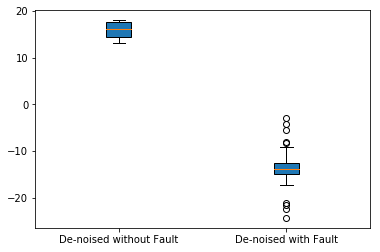

In [21]:
value1 = signal_1
value2 = signal_2
 
box_plot_data=[value1,value2]
plt.boxplot(box_plot_data,patch_artist=True,labels=['De-noised without Fault','De-noised with Fault'])
plt.show()

In [22]:
# Step 3: Modeling Data and Curve Fitting

# References
# Reading: Non-Linear Least-Squares Minimization and Curve-Fitting for Python- https://lmfit.github.io/lmfit-py/
         # -https://lmfit.github.io/lmfit-py/model.html
# The coding    
# https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy  
# https://scipy-cookbook.readthedocs.io/items/FittingData.html  
# To explore deeply into 	Non-Linear Least-Squares Minimization and Curve-Fitting for Python with examples.
# https://www.programcreek.com/python/example/52479/scipy.optimize.leastsq  


from scipy.optimize import leastsq

def fit_sinusoid(signal, title):
    t = np.linspace(0, 2*np.pi, len(signal))  # data covers one period
    g_mean = np.mean(signal)
    g_std = 3*np.std(signal)/(2**0.5)/(2**0.5)
    g_phase = 0
    g_freq = 1
    g_amp = 20 # g= guess

    # Define the function to optimize, in this case, we want to minimize the difference between the actual data and our "guessed" parameters
    optimize_function = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - signal
    E_amp, E_freq, E_phase, E_mean = leastsq(optimize_function, [g_amp, g_freq, g_phase, g_mean])[0]

    # recreate the fitted curve using the optimized parameters
    signal_fit = E_amp*np.sin(E_freq*t+E_phase) + E_mean # E= estimated
    
    return signal_fit
signal_fit1 = fit_sinusoid(signal_1,title1)
signal_fit2 = fit_sinusoid(signal_2,title2)

  

In [23]:

def find_pd_probable(signal_fit, condition):
    first_derivative = np.gradient(signal_fit)
    return [i for i, elem in enumerate(first_derivative) if condition(elem)]

high_prob_region1 = find_pd_probable(signal_fit1, lambda e: e>0)
high_prob_region2 = find_pd_probable(signal_fit2, lambda e: e>0)

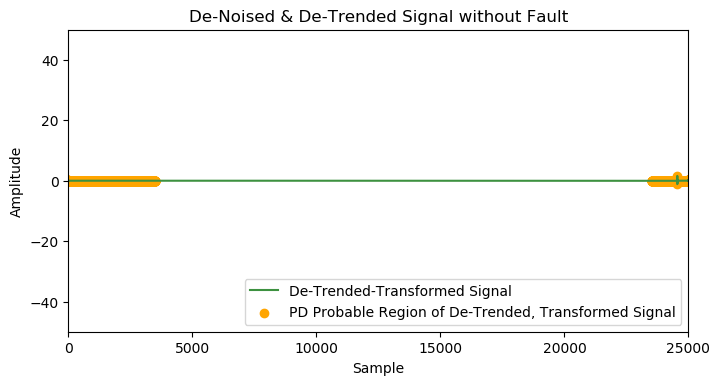

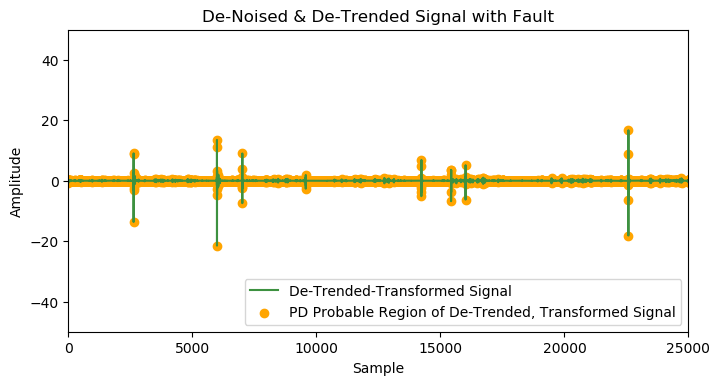

In [24]:
def detrend_signal( signal, high_prob_idx, title=None ):
    
    x = np.diff(signal, n=1)
    if max(high_prob_idx) == len(x):
        high_prob_idx = high_prob_idx[0:-1]
        
    
    f, ax = plt.subplots(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')
    colores = ["#3D9140", "#FF6103", "#8B2323"]
    plt.plot( x, color=colores[0], label="De-Trended-Transformed Signal")
    plt.scatter(high_prob_idx, x[high_prob_idx], color="orange", label="PD Probable Region of De-Trended, Transformed Signal" )
    plt.ylim((-50, 50))
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc='lower right')
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(x)))
    return x[high_prob_idx]


title0 = 'De-Noised & De-Trended Signal without Fault'
title1 = 'De-Noised & De-Trended Signal with Fault'
signal_1hp =  detrend_signal(signal_1, high_prob_region1, title0)
signal_2hp =  detrend_signal(signal_2, high_prob_region2, title1)

0
19


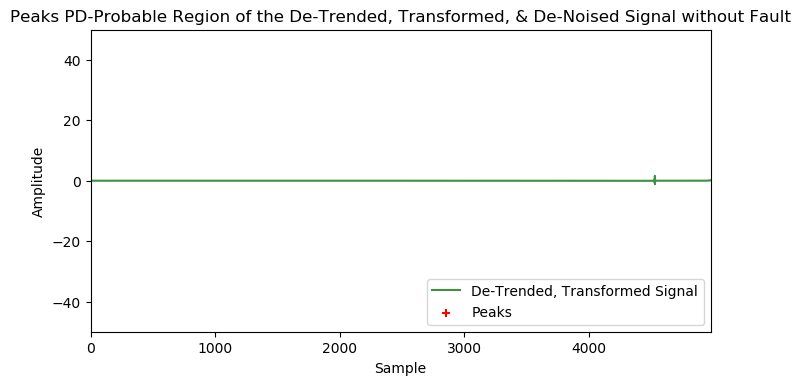

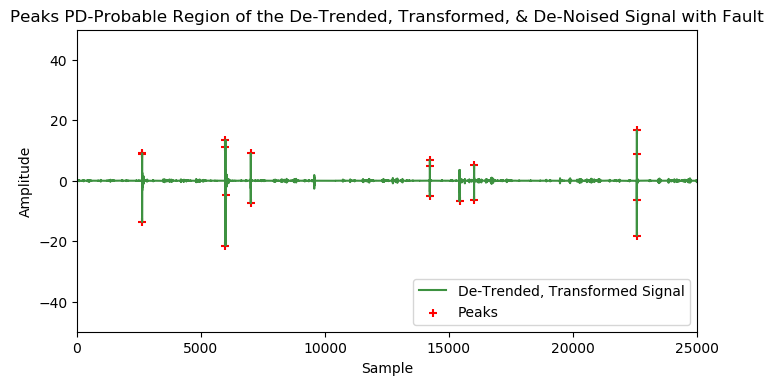

In [25]:
# Finding Peaks (Critical Points)
# Detecting the picks in the signals - importing peakutils

# References

# Reading: https://buildmedia.readthedocs.org/media/pdf/peakutils/latest/peakutils.pdf
# https://github.com/MonsieurV/py-findpeaks/blob/master/README.md

# The coding    
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
# https://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

def find_peaks(signal, title):
    thresh = 0.6  # for peakutils
    thresh = 4.0  # for fixed amplitude
    min_d = 0

    #peaks = peakutils.indexes(1.0*(signal), thres=thresh, min_dist=min_d)  # where peaks are
    peaks = np.argwhere(signal > thresh)
    #valleys = peakutils.indexes(-1.0*(signal), thres=thresh, min_dist=min_d)  # where peaks are
    valleys = np.array(np.argwhere(signal < -thresh))
    pois = np.sort(np.concatenate((peaks, valleys)))
    
    peak_indexes = []
    for pk in pois:
        #peak_indexes.append(pk)
        peak_indexes.append(pk[0])

    f, ax = plt.subplots(figsize=(8, 4), dpi= 100, facecolor='w', edgecolor='k')
    colores = ["#3D9140", "#FF6103", "#8B2323"]
    plt.plot( signal, color="#3D9140", label="De-Trended, Transformed Signal" )
    plt.scatter(peak_indexes, signal[peak_indexes], marker="+", color="red", label="Peaks" )
    plt.ylim((-25, 20))
    plt.ylim((-50, 50))
    plt.xlim((102500, 102600))
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend(loc='lower right')
    if title:
        ax.set_title(title)
    ax.set_xlim((0,len(signal)))
    print(len(peak_indexes))
    return np.sort(peak_indexes)

title0 = 'Peaks PD-Probable Region of the De-Trended, Transformed, & De-Noised Signal without Fault'
title1 = 'Peaks PD-Probable Region of the De-Trended, Transformed, & De-Noised Signal with Fault'
peak_indexes1 = find_peaks(signal_1hp, title=title0 )
peak_indexes2 = find_peaks(signal_2hp, title=title1 )